In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riyashah25","key":"01889b5938d0e06123c82b67403f2efd"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                        Data Science Job Salaries                            7KB  2022-06-15 08:59:12           6570        220  1.0              
surajjha101/bigbasket-entire-product-list-28k-datapoints  BigBasket Entire Product List (~28K datapoints)      6MB  2022-06-22 12:51:18           2150         95  1.0              
victorsoeiro/netflix-tv-shows-and-movies                  Netflix TV Shows and Movies                          2MB  2022-05-15 00:01:23          16884        491  1.0              
sameepvani/nasa-nearest-earth-objects                     NASA - Nearest Earth Objects         

In [8]:
!kaggle datasets list -s 'flicker'

ref                                                  title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
greatgamedota/ffhq-face-data-set                     FFHQ Face Data Set                         2GB  2019-10-12 22:12:09           2226         52  0.8125           
ming666/flicker8k-dataset                            Flicker8k_Dataset                          2GB  2019-04-07 15:20:25           3488         35  0.25             
jainamshah17/flicker8k-image-captioning              Flicker8k - Image Captioning               1GB  2020-08-20 10:56:01            604         13  0.3125           
jerzydziewierz/bee-vs-wasp                           Bee or wasp?                             559MB  2020-08-23 18:07:47           3008        151  0.9411765        
mdte

In [9]:
!kaggle datasets download -d  'ming666/flicker8k-dataset'

100% 2.07G/2.08G [01:03<00:00, 50.5MB/s]
100% 2.08G/2.08G [01:03<00:00, 34.9MB/s]


In [10]:
!unzip flicker8k-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: flickr8k_dataset/Flicker8k_Dataset/2846843520_b0e6211478.jpg  
  inflating: flickr8k_dataset/Flicker8k_Dataset/2847514745_9a35493023.jpg  
  inflating: flickr8k_dataset/Flicker8k_Dataset/2847615962_c330bded6e.jpg  
  inflating: flickr8k_dataset/Flicker8k_Dataset/2847859796_4d9cb0d31f.jpg  
  inflating: flickr8k_dataset/Flicker8k_Dataset/2848266893_9693c66275.jpg  
  inflating: flickr8k_dataset/Flicker8k_Dataset/2848571082_26454cb981.jpg  
  inflating: flickr8k_dataset/Flicker8k_Dataset/2848895544_6d06210e9d.jpg  
  inflating: flickr8k_dataset/Flicker8k_Dataset/2848977044_446a31d86e.jpg  
  inflating: flickr8k_dataset/Flicker8k_Dataset/2849194983_2968c72832.jpg  
  inflating: flickr8k_dataset/Flicker8k_Dataset/2850719435_221f15e951.jpg  
  inflating: flickr8k_dataset/Flicker8k_Dataset/2851198725_37b6027625.jpg  
  inflating: flickr8k_dataset/Flicker8k_Dataset/2851304910_b5721199bc.jpg  
  inflating: flickr8k_dataset/Flicker

In [11]:
from glob import glob
images_path = '/content/Flickr8k_Dataset/Flicker8k_Dataset/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [12]:
images[:5]

['/content/Flickr8k_Dataset/Flicker8k_Dataset/3653462288_bfe2360a64.jpg',
 '/content/Flickr8k_Dataset/Flicker8k_Dataset/432167214_c17fcc1a2d.jpg',
 '/content/Flickr8k_Dataset/Flicker8k_Dataset/3432495898_a5859f06b6.jpg',
 '/content/Flickr8k_Dataset/Flicker8k_Dataset/1295669416_21cabf594d.jpg',
 '/content/Flickr8k_Dataset/Flicker8k_Dataset/3004290523_d1319dfdb4.jpg']

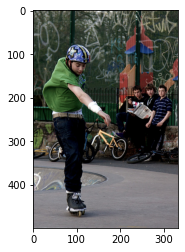

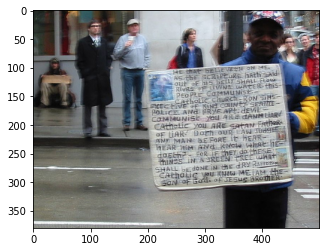

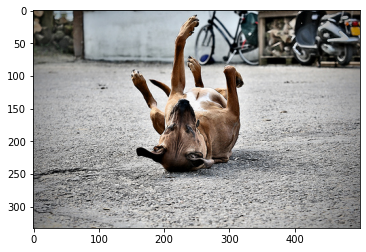

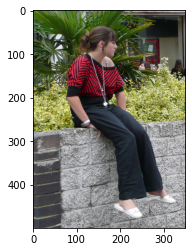

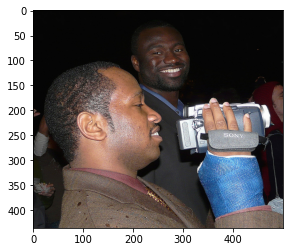

In [13]:
#   show the 5 images

import matplotlib.pyplot as plt
import cv2
for i in range(5):
  plt.figure()
  img = cv2.imread(images[i])
  img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
  plt.imshow(img)

In [14]:
# use resnet50 model and then without fc layer 
from tensorflow.keras.applications import ResNet50

incept_model = ResNet50(include_top = True)

102981632/102967424 [==============================] - 3s 0us/step


In [15]:
incept_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [71]:

from tensorflow.keras.models import Model
last = incept_model.layers[-2].output
model_image = Model(inputs = incept_model.input , outputs  = last)
model_image.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [17]:
# images Preprocess 

images_features = {}

count = 0
for i in images:
  # read image
  img = cv2.imread(i)
  # convert into RGB
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  #resize the image
  img = cv2.resize(img , (224,224))
  # image reshape
  img = img.reshape(1 , img.shape[0] , img.shape[1] , img.shape[2])
  # model predict 
  pred = model_image.predict(img).reshape(2048,)

  img_name = i.split('/')[-1]
  images_features[img_name] = pred
  count +=1
  if count > 1499:
    break
  elif count % 100 == 0:
    print(count)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [18]:
len(images_features)

1500

In [19]:
images_features

{'3653462288_bfe2360a64.jpg': array([0.37829816, 0.70277333, 0.05856679, ..., 2.0967638 , 0.7189273 ,
        1.1593088 ], dtype=float32),
 '432167214_c17fcc1a2d.jpg': array([0.547549  , 1.2424862 , 0.        , ..., 0.12310129, 0.        ,
        2.8999734 ], dtype=float32),
 '3432495898_a5859f06b6.jpg': array([1.0622418 , 0.3461837 , 0.62556386, ..., 0.10007527, 0.06217561,
        0.00129701], dtype=float32),
 '1295669416_21cabf594d.jpg': array([0.9450426 , 0.7219755 , 0.00175079, ..., 0.01426874, 0.00143736,
        0.18970151], dtype=float32),
 '3004290523_d1319dfdb4.jpg': array([0.34186348, 5.812872  , 0.02682389, ..., 1.6276027 , 0.23218454,
        0.0306773 ], dtype=float32),
 '444872454_9f51e07f88.jpg': array([1.0256997 , 5.719677  , 0.01774559, ..., 0.16534501, 0.10943756,
        1.9440429 ], dtype=float32),
 '3249014584_21dd9ddd9d.jpg': array([0.04160746, 2.2910993 , 0.09918845, ..., 0.05167321, 0.30936924,
        0.66628975], dtype=float32),
 '3245504245_27931f5ec1.jpg':

In [20]:
caption_path = '/content/Flickr8k_text/Flickr8k.token.txt'

captions = open(caption_path , 'rb').read().decode('utf-8').split('\n')

In [21]:
len(captions)

40461

In [22]:
captions

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a pai

In [23]:
caption_dict = {}
for i in captions:
  try:
    img_name = i.split('\t')[0][:-2]
    caption = i.split('\t')[1]

    if img_name in images_features:
      if img_name not in caption_dict:
        caption_dict[img_name] = [caption]
      else:
        caption_dict[img_name].append(caption)
  except:
    pass

In [24]:
len(caption_dict)


1500

In [26]:
# 

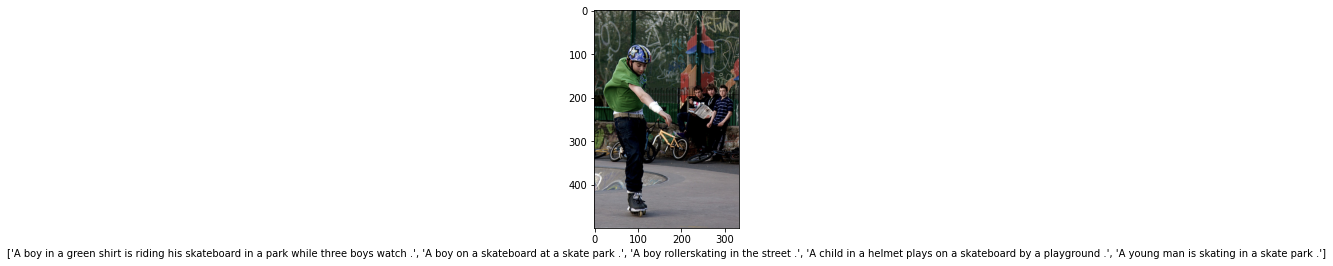

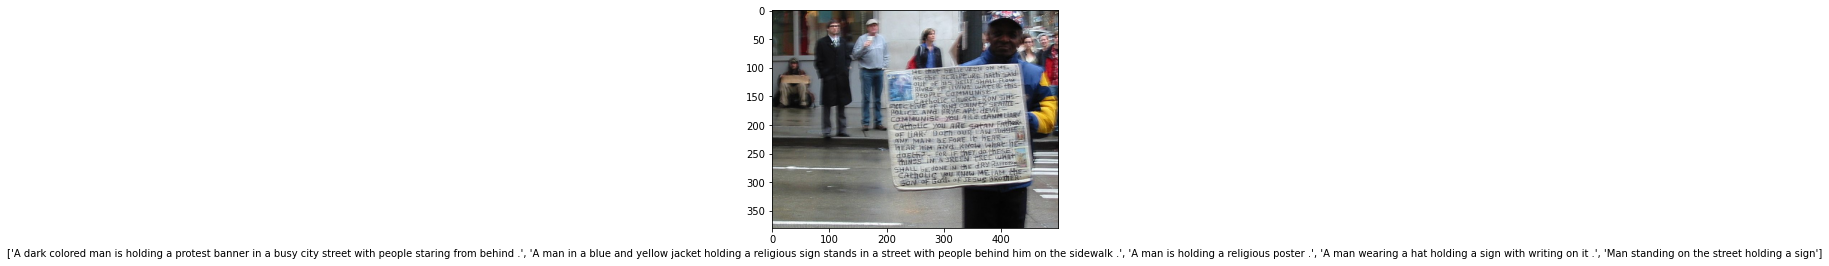

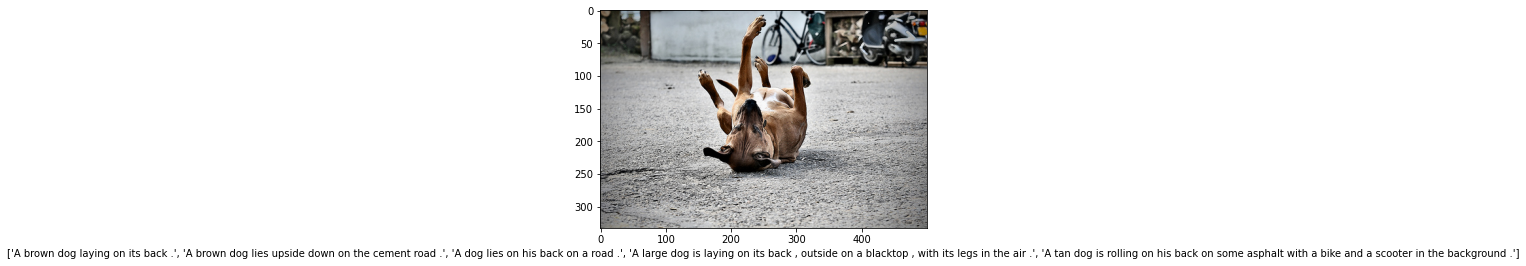

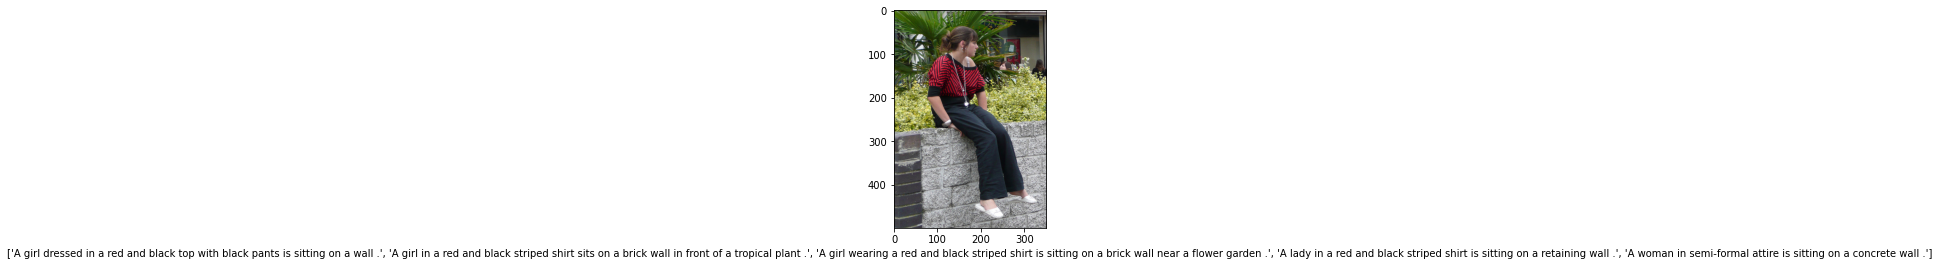

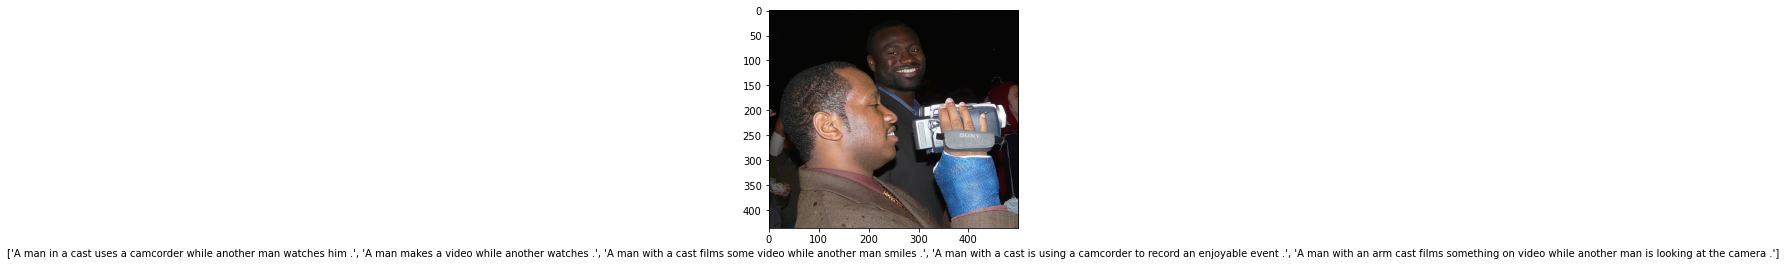

In [27]:
# visualize image with captions

for i in range(5):
  plt.figure()
  img_name = images[i]
  img = cv2.imread(img_name)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.xlabel(caption_dict[img_name.split('/')[-1]])
  plt.imshow(img)

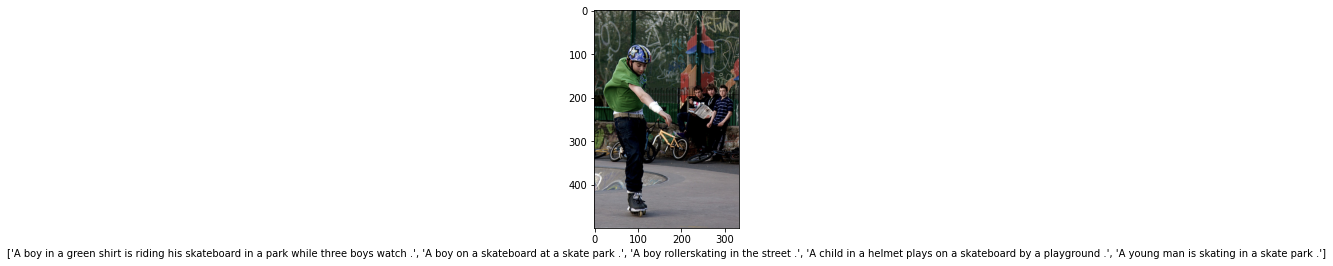

In [28]:
for k in images_features.keys():
  plt.figure()
  img_name = '/content/Flickr8k_Dataset/Flicker8k_Dataset/' + k
  img = cv2.imread(img_name)
    
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.xlabel(caption_dict[img_name.split('/')[-1]])
  plt.imshow(img)
    
  break

In [29]:
# add start and end sequence in caption

def preprocessed(txt):
  modified = txt.lower()
  modified = 'startofseq ' + modified + ' endofseq'
  return modified

In [30]:
for keys,values in caption_dict.items():
  for value in values:
    caption_dict[keys][values.index(value)] = preprocessed(value)

In [31]:
caption_dict

{'1000268201_693b08cb0e.jpg': ['startofseq a child in a pink dress is climbing up a set of stairs in an entry way . endofseq',
  'startofseq a girl going into a wooden building . endofseq',
  'startofseq a little girl climbing into a wooden playhouse . endofseq',
  'startofseq a little girl climbing the stairs to her playhouse . endofseq',
  'startofseq a little girl in a pink dress going into a wooden cabin . endofseq'],
 '101654506_8eb26cfb60.jpg': ['startofseq a brown and white dog is running through the snow . endofseq',
  'startofseq a dog is running in the snow endofseq',
  'startofseq a dog running through snow . endofseq',
  'startofseq a white and brown dog is running through a snow covered field . endofseq',
  'startofseq the white and brown dog is running over the surface of the snow . endofseq'],
 '1026685415_0431cbf574.jpg': ['startofseq a black dog carries a green toy in his mouth as he walks through the grass . endofseq',
  'startofseq a black dog carrying something thro

In [32]:
#  create Vocabulary 

count_words ={}
for keys , values in caption_dict.items():
  for value in values:
    for word in value.split():
      if word not in count_words:
        count_words[word] = 0

      else:
        count_words[word] += 1

In [33]:
len(count_words)

4078

In [34]:
count_words

{'startofseq': 7499,
 'a': 11686,
 'child': 292,
 'in': 3490,
 'pink': 154,
 'dress': 88,
 'is': 1736,
 'climbing': 84,
 'up': 230,
 'set': 16,
 'of': 1270,
 'stairs': 12,
 'an': 430,
 'entry': 0,
 'way': 9,
 '.': 6777,
 'endofseq': 7499,
 'girl': 599,
 'going': 32,
 'into': 241,
 'wooden': 50,
 'building': 112,
 'little': 312,
 'playhouse': 1,
 'the': 3428,
 'to': 623,
 'her': 225,
 'cabin': 1,
 'brown': 481,
 'and': 1644,
 'white': 766,
 'dog': 1604,
 'running': 434,
 'through': 401,
 'snow': 244,
 'covered': 48,
 'field': 215,
 'over': 264,
 'surface': 9,
 'black': 741,
 'carries': 22,
 'green': 173,
 'toy': 106,
 'his': 428,
 'mouth': 189,
 'as': 155,
 'he': 33,
 'walks': 101,
 'grass': 295,
 'carrying': 76,
 'something': 69,
 'has': 107,
 'blue': 396,
 'its': 182,
 'with': 1422,
 'item': 5,
 'wet': 36,
 'man': 1362,
 'baby': 84,
 'are': 661,
 'yellow': 232,
 'kayak': 12,
 'on': 1994,
 'water': 564,
 'boy': 674,
 'life': 16,
 'jackets': 11,
 'rowing': 8,
 'canoe': 12,
 'gentle': 0,

In [35]:
# create the new dict in that key is as unique word of caption and value os that is number like 1 ,2 ,3....
# to create this dict for the encode the captions of caption_dict because there are no words are used everything is in vector

Thresh = -1
count = 1
new_dict = {}
for key ,value in count_words.items():
  if count_words[key] > -1:
    new_dict[key] = count
    count += 1 

In [36]:
new_dict

{'startofseq': 1,
 'a': 2,
 'child': 3,
 'in': 4,
 'pink': 5,
 'dress': 6,
 'is': 7,
 'climbing': 8,
 'up': 9,
 'set': 10,
 'of': 11,
 'stairs': 12,
 'an': 13,
 'entry': 14,
 'way': 15,
 '.': 16,
 'endofseq': 17,
 'girl': 18,
 'going': 19,
 'into': 20,
 'wooden': 21,
 'building': 22,
 'little': 23,
 'playhouse': 24,
 'the': 25,
 'to': 26,
 'her': 27,
 'cabin': 28,
 'brown': 29,
 'and': 30,
 'white': 31,
 'dog': 32,
 'running': 33,
 'through': 34,
 'snow': 35,
 'covered': 36,
 'field': 37,
 'over': 38,
 'surface': 39,
 'black': 40,
 'carries': 41,
 'green': 42,
 'toy': 43,
 'his': 44,
 'mouth': 45,
 'as': 46,
 'he': 47,
 'walks': 48,
 'grass': 49,
 'carrying': 50,
 'something': 51,
 'has': 52,
 'blue': 53,
 'its': 54,
 'with': 55,
 'item': 56,
 'wet': 57,
 'man': 58,
 'baby': 59,
 'are': 60,
 'yellow': 61,
 'kayak': 62,
 'on': 63,
 'water': 64,
 'boy': 65,
 'life': 66,
 'jackets': 67,
 'rowing': 68,
 'canoe': 69,
 'gentle': 70,
 'waters': 71,
 'young': 72,
 'ride': 73,
 'woman': 74,
 'p

In [37]:
new_dict['<out>'] = len(new_dict)

In [38]:
new_dict['<out>']

4078

In [39]:
captions_backup = caption_dict.copy()


In [40]:
# caption_dict = captions_backup.copy()


In [41]:
# using new_dict encoded the cptions dict for the train model 

for key , values in caption_dict.items():
  for value in values:
    encoded = []
    for word in value.split():
      if word not in new_dict:
        encoded.append(new_dict['<out>'])
      else:
        encoded.append(new_dict[word])
    caption_dict[key][values.index(value)] = encoded
    

In [43]:
caption_dict['3394070357_cb2a3243fc.jpg']

[[1, 2, 1759, 32, 258, 34, 64, 16, 17],
 [1, 2, 106, 286, 32, 279, 224, 11, 25, 64, 17],
 [1, 106, 29, 32, 279, 224, 11, 25, 64, 16, 17],
 [1, 25, 1703, 32, 223, 34, 25, 64, 16, 17],
 [1, 57, 29, 32, 94, 279, 224, 11, 25, 64, 16, 17]]

### #  build Generator Function

In [44]:
from tensorflow.keras.utils import to_categorical    # convert the class vector to categorical cross entropy class vector
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [45]:
MAX_LEN = 0
for k, vv in caption_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 2, 5, 6, 7, 8, 9, 2, 10, 11, 12, 4, 13, 14, 15, 16, 17]
[1, 2, 58, 7, 81, 25, 82, 11, 2, 74, 9, 26, 44, 45, 4, 83, 11, 84, 85, 78, 79, 58, 80, 63, 16, 17]
[1, 2, 58, 4, 64, 172, 2, 23, 65, 9, 4, 25, 176, 30, 180, 76, 115, 26, 181, 123, 182, 47, 183, 179, 115, 16, 17]
[1, 204, 60, 205, 72, 157, 94, 146, 162, 297, 81, 2, 298, 299, 94, 146, 55, 212, 300, 301, 30, 302, 4, 27, 45, 94, 30, 146, 55, 303, 304, 16, 17]
[1, 2, 162, 297, 74, 175, 2, 29, 101, 30, 902, 903, 30, 2, 904, 58, 175, 2, 42, 905, 30, 53, 351, 55, 2, 621, 906, 94, 312, 154, 25, 907, 11, 25, 669, 16, 17]


In [46]:
MAX_LEN

37

In [47]:
batch_size = 300
vocab_size = len(new_dict)

def generator(photo , caption):
  n_samples = 0

  X = []       # image features 
  y_in = []    # input (first) sequence of that caption 
  y_out = []   # output (next) sequence of that caption

  for key , values in caption.items():
    for value in values:
      for i in range(1 , len(value)):
        X.append(photo[key])
        in_seq = [value[:i]]
        out_seq = value[i]

        in_seq = pad_sequences(in_seq , maxlen = MAX_LEN , padding = 'post')[0]
        out_seq = to_categorical([out_seq] , num_classes=vocab_size)[0]

        y_in.append(in_seq)
        y_out.append(out_seq)

  return X,y_in,y_out

In [48]:
# # for the understanding of above in_seq and out_seq
# voc_size = 100
# value = [11,22,33,44,55,66,77,88,99]
# for i in range(1,len(value)):
#   # print(i)
#   a = [value[:i]]
#   b = value[i]
#   print("in_seq = ",a)
  
#   print("out_seq = ",b)

#   in_seq = pad_sequences(a , maxlen = 10 , padding = 'post')
#   out_seq = to_categorical([b] , num_classes=vocab_size )
#   print(in_seq)
#   print(out_seq)

In [49]:
X , y_in , y_out = generator(images_features , caption_dict)

In [50]:
len(X) , len(y_in) , len(y_out)

(96425, 96425, 96425)

In [51]:
X[0] , y_in[0] , y_out[0]

(array([0.1672582 , 0.46361965, 0.00352367, ..., 0.11895228, 0.42634124,
        1.3226005 ], dtype=float32),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32))

In [52]:
import numpy as np
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')


In [53]:
X.shape, y_in.shape, y_out.shape

((96425, 2048), (96425, 37), (96425, 4079))

### Model


In [54]:
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers import Flatten , Convolution2D , Input , Dense , LSTM , Embedding , Dropout , Concatenate ,RepeatVector , TimeDistributed , Activation
# from tensorflow.keras.layers import A


In [60]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()
image_model.add(Dense(embedding_size , input_shape = (2048,),activation = 'relu' ))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()
language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output , language_model.output])
x = LSTM(128 , return_sequences=True)(conca)
x = LSTM(512 , return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs = [image_model.input , language_model.input] , outputs = out)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#RMSprop
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 repeat_vector_1 (RepeatVect  (None, 37, 128)          0         
 or)                                                             
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 37, 128)           522112    
                                                                 
 lstm_3 (LSTM)               (None, 37, 256)           394240    
                          

In [61]:
model.fit([X, y_in], y_out, batch_size=512, epochs=80)


Epoch 1/80
189/189 [==============================] - 21s 85ms/step - loss: 5.4250 - accuracy: 0.1195
Epoch 2/80
189/189 [==============================] - 16s 86ms/step - loss: 5.2597 - accuracy: 0.1211
Epoch 3/80
189/189 [==============================] - 17s 89ms/step - loss: 5.1793 - accuracy: 0.1207
Epoch 4/80
189/189 [==============================] - 17s 89ms/step - loss: 5.1162 - accuracy: 0.1211
Epoch 5/80
189/189 [==============================] - 16s 87ms/step - loss: 5.0709 - accuracy: 0.1206
Epoch 6/80
189/189 [==============================] - 16s 86ms/step - loss: 5.0360 - accuracy: 0.1206
Epoch 7/80
189/189 [==============================] - 16s 87ms/step - loss: 4.9849 - accuracy: 0.1210
Epoch 8/80
189/189 [==============================] - 17s 88ms/step - loss: 4.9083 - accuracy: 0.1209
Epoch 9/80
189/189 [==============================] - 17s 89ms/step - loss: 4.6812 - accuracy: 0.1703
Epoch 10/80
189/189 [==============================] - 17s 87ms/step - loss: 4.155

In [65]:
inv_dict = {v:k for k, v in new_dict.items()}
# inv_dict

In [75]:
def getImage(x):
  test_img_path = images[x]
  test_img = cv2.imread(test_img_path)
  test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

  test_img = cv2.resize(test_img, (224,224))

  test_img = np.reshape(test_img, (1,224,224,3))
    
  return test_img

## Predictions

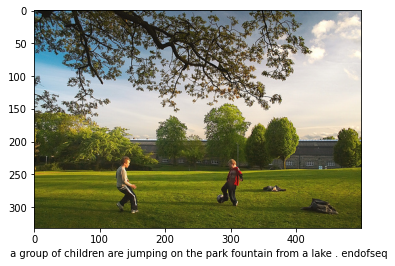

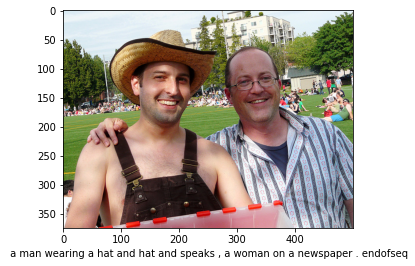

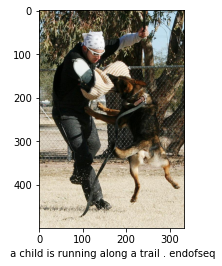

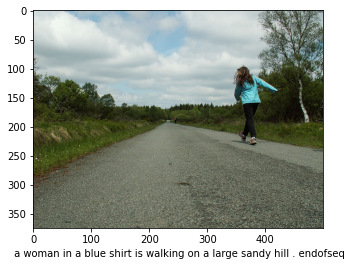

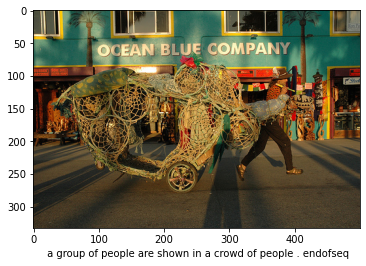

In [83]:
for i in range(5):
  no = np.random.randint(1500 , 7000 , (1,1))[0,0]
  test_feature = model_image.predict(getImage(no)).reshape(1,2048)
  test_img_path = images[no]
  test_img = cv2.imread(test_img_path)
  test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

  text_inp = ['startofseq']

  count = 0
  caption = ""

  while count < 25:
    count +=1
    encoded = []
    for i in text_inp:
      encoded.append(new_dict[i])
    encoded = [encoded]
    encoded = pad_sequences(encoded , padding = 'post' , maxlen=MAX_LEN)
    prediction = np.argmax(model.predict([test_feature , encoded]))

    sampled_word = inv_dict[prediction]
    caption = caption + ' ' + sampled_word

    if sampled_word == 'endofseq':
      break

    text_inp.append(sampled_word)
        
  plt.figure()
  plt.imshow(test_img)
  plt.xlabel(caption)

In [76]:
test_feature = model_image.predict(getImage(no)).reshape(1,2048)

In [77]:
test_feature

array([[0.57194746, 1.0762467 , 0.51180047, ..., 0.60140187, 0.04727197,
        0.44100967]], dtype=float32)

In [69]:
getImage(no).reshape()

array([[[[105, 104, 100],
         [129, 125, 124],
         [148, 144, 145],
         ...,
         [  1,   1,   1],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[110, 107, 106],
         [120, 116, 115],
         [134, 130, 131],
         ...,
         [  2,   2,   2],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[126, 122, 124],
         [124, 120, 119],
         [132, 127, 126],
         ...,
         [  2,   2,   2],
         [  1,   1,   1],
         [  0,   0,   0]],

        ...,

        [[ 48,  69,   7],
         [ 33,  52,   8],
         [ 32,  51,   6],
         ...,
         [ 61,  84,   0],
         [ 51,  73,   0],
         [ 49,  68,   9]],

        [[ 35,  56,   1],
         [ 22,  38,  10],
         [ 17,  32,   2],
         ...,
         [ 51,  74,   2],
         [ 42,  61,   6],
         [ 66,  88,  10]],

        [[ 34,  55,   3],
         [ 21,  38,   1],
         [ 33,  49,   6],
         ...,
         [ 61,  83,  16],
        

In [70]:
no

1793